## 0. 전처리 데이터 받아오기 및 데이터 분리

In [46]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

In [3]:
# 한글 폰트 사용 설정
# import matplotlib
# import matplotlib.font_manager as fm

# fontpath = 'C:\\Windows\\Fonts\\batang.TTC'    # 폰트경로
# font = fm.FontProperties(fname=fontpath).get_name()     # 이름을 가져옴
# matplotlib.rc("font", family = font)    # 폰트설정 변경

In [4]:
df = pd.read_csv('./data/new preprocessed Data.csv')
df.shape
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'G1', 'G2', 'G3', 'G_mean'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split  # type: ignore

# X=df.drop(['G1','G2','G3','G_mean'],axis = 1)
# y=df['G_mean']


X=df.drop(['G3','G_mean'],axis = 1)
y=df['G3']



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


# 첫번째 방식 ) 원래X -> 평균 G_mean
# 두번째 방식 ) 원래 X 데이터 + G1, G2 => G3


## 1. 회귀 (담당 : 예찬)

In [47]:
# 선형회귀
from sklearn.linear_model import LinearRegression

# 3. 훈련/테스트 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 5. 예측 수행
y_pred = model.predict(X_test)

# 6. 모델 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 결과 출력
mse, rmse, r2

(2.8135188459017857, 1.677354716779306, 0.707961442100898)

## 2. 결정트리 (담당: 주은)

#### 1) 환경요인 확인 분석

In [41]:
# 목표 변수 설정
y = df['G_mean']
X = df.drop(columns=['G_mean','G1', 'G2', 'G3'])

# y 스케일링
scaler = MinMaxScaler()
y = scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

In [42]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 모델 훈련 및 평가
from sklearn.tree import DecisionTreeRegressor

# 학습
dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=15, min_samples_split=15,random_state=42)
dt.fit(X_train, y_train)

# 훈련
pred_train = dt.predict(X_train)
pred_test = dt.predict(X_test)

# 평가
mse_test = mean_squared_error(y_test, pred_test)
rmse_test = root_mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

print(f'mse: {mse_test}, rmse: {rmse_test}, r2: {r2_test}')

mse: 0.03433893070620746, rmse: 0.18530766499583187, r2: 0.13318770796900226


#### 2) 성적 포함(G1)

[설명서]


y는 G3, 

X는 G_mean, G3, G2를 제외한 나머지 컬럼
- G2를 제외하는 이유:
이유를 모르겠지만 G2를 포함시키면 특성 중요도에서 G2가 100%가 나옴.

In [43]:
X = df.drop(columns=['G_mean', 'G3' , 'G2'])
y = df['G3']

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 학습
dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=15, min_samples_split=15, random_state=42)
dt.fit(X_train, y_train)

# 훈련
pred_train = dt.predict(X_train)
pred_test = dt.predict(X_test)

# 평가
mse_test = mean_squared_error(y_test, pred_test)
rmse_test = root_mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

print(f'mse: {mse_test}, rmse: {rmse_test}, r2: {r2_test}')

mse: 2.4841460602219283, rmse: 1.576117400520002, r2: 0.7368489342985245


In [44]:
# 훈련 데이터 평가
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = root_mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)

print(f'Training MSE: {mse_train}, RMSE: {rmse_train}, R²: {r2_train}')

Training MSE: 2.1325076541228225, RMSE: 1.4603108073704114, R²: 0.8003221415768323


1. G1 (0.9883353619019547)
2. absences (0.011664638098045174)
3. freetime (0.0)
4. romantic (0.0)
5. internet (0.0)
6. higher (0.0)
7. nursery (0.0)
8. activities (0.0)
9. paid (0.0)
10. famsup (0.0)
11. schoolsup (0.0)
12. failures (0.0)
13. studytime (0.0)
14. traveltime (0.0)
15. Fedu (0.0)
16. Medu (0.0)
17. Pstatus (0.0)
18. famsize (0.0)
19. address (0.0)
20. age (0.0)
21. sex (0.0)
22. famrel (0.0)
23. goout (0.0)
24. guardian_other (0.0)
25. Fjob_other (0.0)
26. guardian_mother (0.0)
27. guardian_father (0.0)
28. reason_reputation (0.0)
29. reason_other (0.0)
30. reason_home (0.0)
31. reason_course (0.0)
32. Fjob_teacher (0.0)
33. Fjob_services (0.0)
34. Fjob_health (0.0)
35. Dalc (0.0)
36. Fjob_at_home (0.0)
37. Mjob_teacher (0.0)
38. Mjob_services (0.0)
39. Mjob_other (0.0)
40. Mjob_health (0.0)
41. Mjob_at_home (0.0)
42. health (0.0)
43. Walc (0.0)
44. school (0.0)


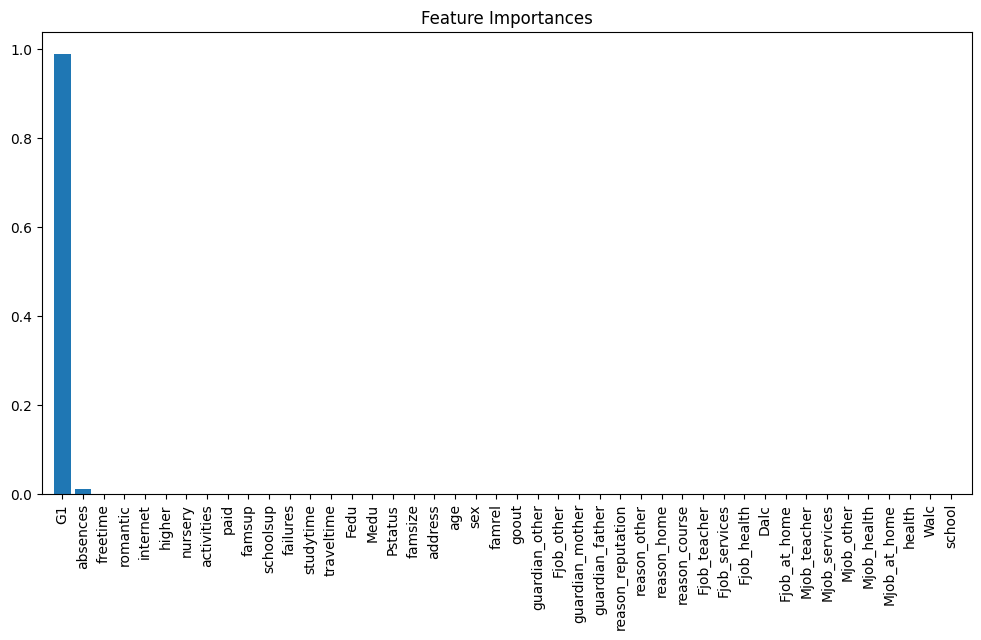

In [45]:
# 특성 중요도 확인
import matplotlib.pyplot as plt

importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

# 중요도가 높은 특성 순으로 출력
for f in range(X_train.shape[1]):
    print(f'{f + 1}. {X.columns[indices[f]]} ({importances[indices[f]]})')

# 그래프를 통해 특성 중요도 시각화
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## 3. 앙상블

### 3.1) 보팅 (주은)

#### 1) 환경적 요인 확인

In [36]:
# 목표 변수 설정
y = df['G_mean']
X = df.drop(columns=['G_mean','G1', 'G2', 'G3'])

# y 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

# 데이터 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [37]:
from sklearn.ensemble import VotingRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

knn_reg = KNeighborsRegressor()
lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(max_depth=3,min_samples_leaf=10, min_samples_split=10, random_state=0)
svr_reg = SVR()

voting_reg = VotingRegressor(
    estimators=[
        ('knn_clf', knn_reg),
        ('lin_clf', lin_reg),
        ('dt_clf', dt_reg),
        ('svr_reg', svr_reg)
    ]
)
# 훈련 
voting_reg.fit(X_train, y_train)

y_pred_train = voting_reg.predict(X_train)
y_pred_test = voting_reg.predict(X_test)

mse =  mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2}')

MSE: 0.030719299884496593, RMSE: 0.17526922115561702, R2: 0.22455748636184147


#### 2) G2를 빼고 이용

In [38]:
X = df.drop(columns=['G_mean', 'G3' , 'G2'])
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
# 훈련 
voting_reg.fit(X_train, y_train)


y_pred_train = voting_reg.predict(X_train)
y_pred_test = voting_reg.predict(X_test)

mse =  mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2}')

MSE: 2.2767924858029702, RMSE: 1.5089043991595261, R2: 0.7640599363517212


### 3.2) 배깅 (도연)

In [28]:
from sklearn.ensemble import BaggingRegressor # type: ignore
from sklearn.tree import DecisionTreeRegressor # type: ignore


# 기본 모델로 의사결정나무 회귀 사용
base_regressor = DecisionTreeRegressor(random_state=42)

# BaggingRegressor로 앙상블 학습
bagging_model = BaggingRegressor()#base_estimator=base_regressor, n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

# 예측
y_pred = bagging_model.predict(X_test)

# 성능 평가 (평균제곱오차, MSE)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}| r2 score: {r2}')

# 예측
y_pred = bagging_model.predict(X_train)

# 성능 평가 (평균제곱오차, MSE)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f'Mean Squared Error: {mse}| r2 score: {r2}')




Mean Squared Error: 0.9418055555555556| r2 score: 0.9105408970976253
Mean Squared Error: 0.14873684210526317| r2 score: 0.9855793952994258


### 3.3) 부스팅 (예찬)

In [48]:
from xgboost import XGBRegressor


# 훈련 세트와 테스트 세트 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성 및 학습
model = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(1.2720414400100708, 1.635361356670592, 0.7224010229110718)

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# LightGBM 라이브러리 로드
from lightgbm import LGBMRegressor

# LightGBM 회귀 모델 학습
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgbm_model.fit(X_train, y_train)

# 예측
y_pred_lgbm = lgbm_model.predict(X_test)

# 모델 평가 (MSE, R² Score)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

# 결과 출력
mse_lgbm, r2_lgbm

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
# Simple Gradient Boosting 모델 학습
sgb_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=2, random_state=42)
sgb_model.fit(X_train, y_train)

# 예측
y_pred_sgb = sgb_model.predict(X_test)

# 모델 평가 (MSE, R² Score)
mse_sgb = mean_squared_error(y_test, y_pred_sgb)
r2_sgb = r2_score(y_test, y_pred_sgb)

# 결과 출력
mse_sgb, r2_sgb

(1.9466974114218667, 0.7979360594916013)

In [51]:
from sklearn.ensemble import HistGradientBoostingRegressor

# HistGradientBoosting 모델 학습
hgb_model = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)
hgb_model.fit(X_train, y_train)

# 예측
y_pred_hgb = hgb_model.predict(X_test)

# 모델 평가 (MSE, R² Score)
mse_hgb = mean_squared_error(y_test, y_pred_hgb)
r2_hgb = r2_score(y_test, y_pred_hgb)

# 결과 출력
mse_hgb, r2_hgb

(2.5450985121875065, 0.7358230245043342)

### 3.4) 랜덤포레스트 (도연)

In [27]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

# 학습
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print(f'Mean Squared Error: {mse}| r2 score: {r2}')


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}| r2 score: {r2}')
# rf_clf.estimators_ : 100개의 DecisionTreeClassifier를 확인


# print(rf_clf.estimators_samples_)       # 100개의 DecisionTreeClassifier가 사용한 샘플 데이터 확인


# 특성 중요도 확인
fis = pd.Series(model.feature_importances_, index= X.columns).sort_values(ascending=False)
fis


Mean Squared Error: 0.15632018090183167| r2 score: 0.9848441616508692
Mean Squared Error: 0.8631471389022081| r2 score: 0.9180124089697111


G2                   0.943386
G1                   0.007362
absences             0.004236
Walc                 0.003569
famrel               0.003013
health               0.002830
goout                0.002798
studytime            0.002511
Medu                 0.002505
age                  0.002072
Fedu                 0.002006
nursery              0.001523
traveltime           0.001347
failures             0.001260
freetime             0.001260
reason_course        0.001056
Fjob_other           0.001016
famsize              0.000991
romantic             0.000942
Dalc                 0.000906
schoolsup            0.000857
Mjob_services        0.000800
reason_reputation    0.000777
reason_home          0.000749
Mjob_teacher         0.000743
sex                  0.000728
Fjob_health          0.000686
activities           0.000655
Mjob_other           0.000639
Mjob_health          0.000636
Fjob_services        0.000623
paid                 0.000568
famsup               0.000493
Mjob_at_ho

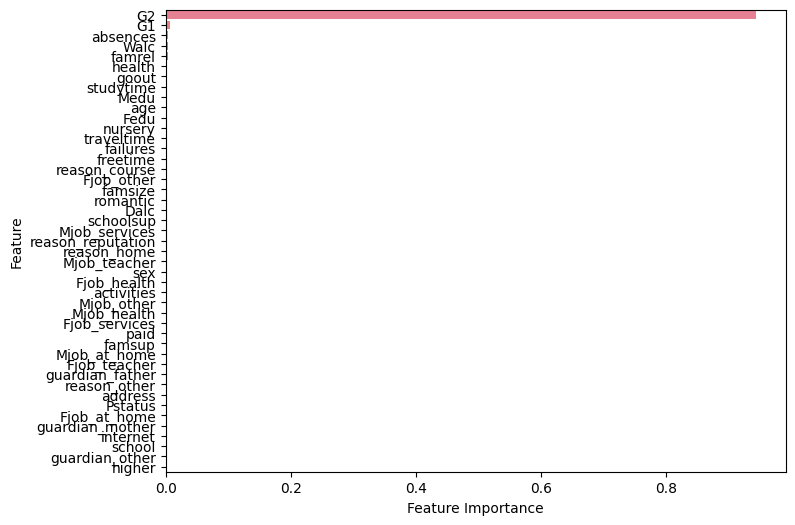

In [24]:
# 특성 중요도 시각화
plt.figure(figsize=(8,6))
sns.barplot(
    x=fis,
    y=fis.index,
    hue=fis.index
)

plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()